In [ ]:
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/Transmitance_for_five_pure_oils.csv')

In [ ]:
data.tail()

,S.no,name_of_the_oil,5.5,5.542187691,5.584374905,5.626562595,5.668749809,5.7109375,5.753125191,5.795312405,...,10.52031231,10.5625,10.60468769,10.64687538,10.68906212,10.73124981,10.7734375,10.81562519,10.85781288,category
157,158,NKL_OIL,1.865906,1.759737,1.688241,1.658621,1.650542,1.623044,1.676432,1.747398,...,1.741091,1.783628,1.771340,1.844891,1.818419,1.902184,1.910836,1.935007,1.951156,5
158,159,NKL_OIL,1.873211,1.782930,1.697358,1.652553,1.665016,1.640496,1.681959,1.773302,...,1.688139,1.735218,1.773445,1.832829,1.844043,1.865913,1.913535,1.913565,1.936484,5
159,160,NKL_OIL,1.861070,1.770336,1.711104,1.675662,1.647659,1.646906,1.663845,1.757618,...,1.745374,1.760020,1.762330,1.829457,1.861355,1.845143,1.858873,1.905629,1.979852,5
160,161,NKL_OIL,1.857408,1.762520,1.707312,1.659068,1.645456,1.641097,1.683355,1.758061,...,1.711848,1.768969,1.741053,1.799929,1.853751,1.836653,1.938348,1.966394,1.955161,5
161,162,NKL_OIL,1.861578,1.780516,1.718736,1.652771,1.642371,1.652987,1.696535,1.782227,...,1.677909,1.723855,1.747672,1.816280,1.845878,1.825575,1.894720,1.924564,1.947506,5


In [ ]:
data['category'].values


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5])

In [ ]:
data.tail()

,S.no,name_of_the_oil,5.5,5.542187691,5.584374905,5.626562595,5.668749809,5.7109375,5.753125191,5.795312405,...,10.52031231,10.5625,10.60468769,10.64687538,10.68906212,10.73124981,10.7734375,10.81562519,10.85781288,category
157,158,NKL_OIL,1.865906,1.759737,1.688241,1.658621,1.650542,1.623044,1.676432,1.747398,...,1.741091,1.783628,1.771340,1.844891,1.818419,1.902184,1.910836,1.935007,1.951156,5
158,159,NKL_OIL,1.873211,1.782930,1.697358,1.652553,1.665016,1.640496,1.681959,1.773302,...,1.688139,1.735218,1.773445,1.832829,1.844043,1.865913,1.913535,1.913565,1.936484,5
159,160,NKL_OIL,1.861070,1.770336,1.711104,1.675662,1.647659,1.646906,1.663845,1.757618,...,1.745374,1.760020,1.762330,1.829457,1.861355,1.845143,1.858873,1.905629,1.979852,5
160,161,NKL_OIL,1.857408,1.762520,1.707312,1.659068,1.645456,1.641097,1.683355,1.758061,...,1.711848,1.768969,1.741053,1.799929,1.853751,1.836653,1.938348,1.966394,1.955161,5
161,162,NKL_OIL,1.861578,1.780516,1.718736,1.652771,1.642371,1.652987,1.696535,1.782227,...,1.677909,1.723855,1.747672,1.816280,1.845878,1.825575,1.894720,1.924564,1.947506,5


In [ ]:
data =pd.read_csv("/content/result (1).csv")

In [ ]:


l=data.drop(['water','Wavelength'],axis=1)
m=data['water']

import matplotlib.pyplot as plt
from numpy import *
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(l,m)
scaled_data = scaler.transform(l)
scaled_data
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

m=data['water']
classes = ['1%','2%','3%','4%','5%','6%','7%','8%']
values = m
colour = ListedColormap(['r','b','g','y','k','m','cyan','pink'])

scatter = plt.scatter(x_pca[:,0],x_pca[:,1],c = values , cmap = colour)
plt.legend(handles = scatter.legend_elements()[0], labels = classes)
plt.title('PCA FOR WATER WITH AND WITHOUT PADIKARAM')

KeyError: "['water', 'Wavelength'] not found in axis"

Text(0.5, 1.0, 'PLSR FOR OIL FROM Different LOcation')

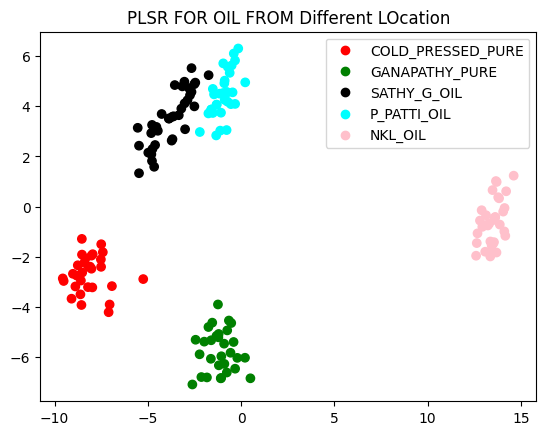

In [ ]:
p=data.drop(['category','name_of_the_oil'],axis=1)
q=data['category']

import matplotlib.pyplot as plt
from numpy import *
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib.colors import ListedColormap



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(p,q)
scaled_data = scaler.transform(p)
scaled_data



from sklearn.cross_decomposition import PLSRegression
plsr = PLSRegression(n_components=4)
plsr.fit(scaled_data,q)
x_pls = plsr.transform(scaled_data)


m=data['category']
classes = ['COLD_PRESSED_PURE','GANAPATHY_PURE','SATHY_G_OIL','P_PATTI_OIL','NKL_OIL']
values = m
colour = ListedColormap(['r','b','g','y','k','m','cyan','pink'])

scatter = plt.scatter(x_pls[:,0],x_pls[:,1],c = values , cmap = colour)
plt.legend(handles = scatter.legend_elements()[0], labels = classes)
plt.title('PLSR FOR OIL FROM Different LOcation')


SVM Results:
Accuracy: 0.426 ± 0.019
Precision: 0.856
Recall: 0.400
F1-score: 0.287


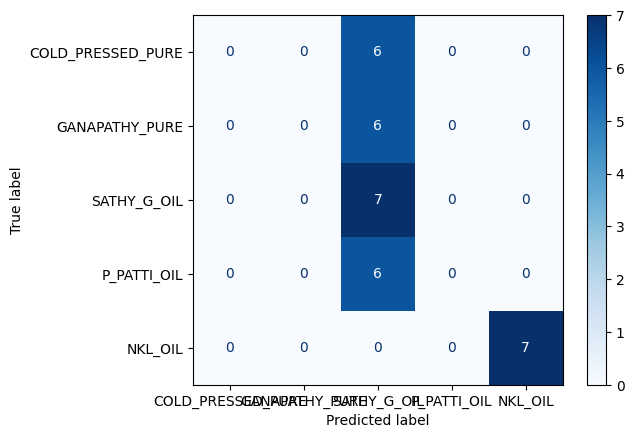


RandomForest Results:
Accuracy: 1.000 ± 0.000
Precision: 1.000
Recall: 1.000
F1-score: 1.000


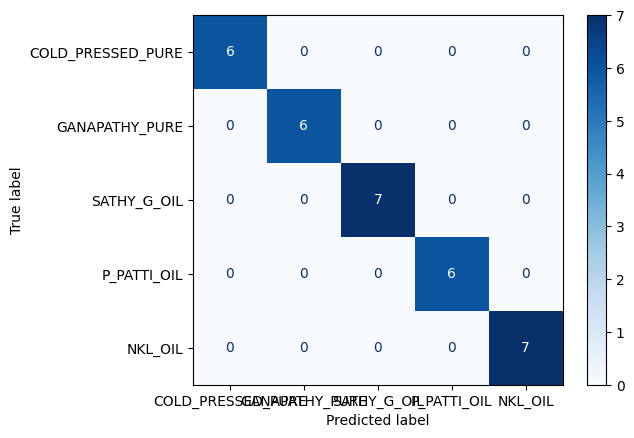

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[04:46:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[04:46:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[04:46:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[04:46:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[04:46:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





XGBoost Results:
Accuracy: 0.981 ± 0.015
Precision: 0.984
Recall: 0.981
F1-score: 0.981


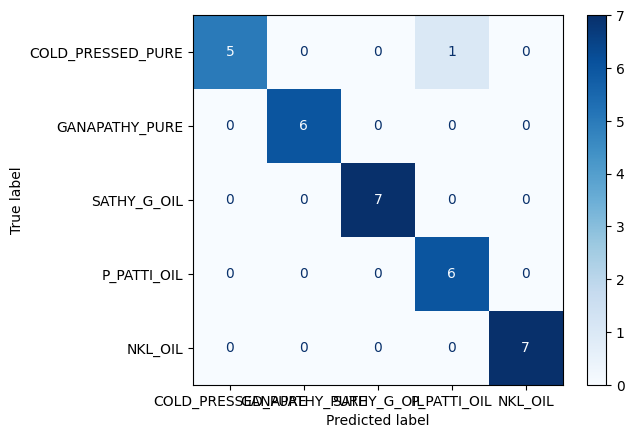

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.




MLP Results:
Accuracy: 1.000 ± 0.000
Precision: 1.000
Recall: 1.000
F1-score: 1.000


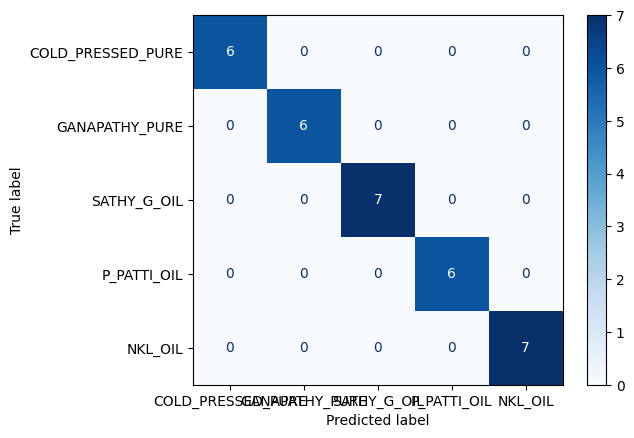

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load data
df = pd.read_csv("/content/Transmitance_for_five_pure_oils.csv")

# get features and labels
X = df.iloc[:, 2:-1].values   # skip S.no, name
y = df['category'].values - 1 # Subtract 1 to make the categories zero-indexed

# Stratified 5-fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Models to compare
models = {
    "SVM": SVC(kernel='rbf', probability=True),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(50,30), max_iter=1000, random_state=42)
}

# Define class names
class_names = ['COLD_PRESSED_PURE','GANAPATHY_PURE','SATHY_G_OIL','P_PATTI_OIL','NKL_OIL']

for name, model in models.items():
    acc = []
    prec = []
    rec = []
    f1 = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc.append(accuracy_score(y_test, y_pred))
        prec.append(precision_score(y_test, y_pred, average='macro', zero_division=1))
        rec.append(recall_score(y_test, y_pred, average='macro'))
        f1.append(f1_score(y_test, y_pred, average='macro'))

    print(f"\n{name} Results:")
    print(f"Accuracy: {np.mean(acc):.3f} ± {np.std(acc):.3f}")
    print(f"Precision: {np.mean(prec):.3f}")
    print(f"Recall: {np.mean(rec):.3f}")
    print(f"F1-score: {np.mean(f1):.3f}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap="Blues")
    plt.show()

In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
import numpy as np

# X: shape (samples, features)
# y: shape (samples,)
# make sure y is class labels, for example [0,1,2,...]

# one-hot encode classes
lb = LabelBinarizer()
Y_onehot = lb.fit_transform(y)

pls = PLSRegression(n_components=5)  # you can tune components 2–10

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accs = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    Y_train, Y_test = Y_onehot[train_idx], Y_onehot[test_idx]

    pls.fit(X_train, Y_train)
    Y_pred = pls.predict(X_test)
    # take argmax to assign class
    y_pred_class = np.argmax(Y_pred, axis=1)
    acc = accuracy_score(y[test_idx], y_pred_class)
    accs.append(acc)

print(f"PLSR baseline accuracy: {np.mean(accs):.3f} ± {np.std(accs):.3f}")


PLSR baseline accuracy: 1.000 ± 0.000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[05:37:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




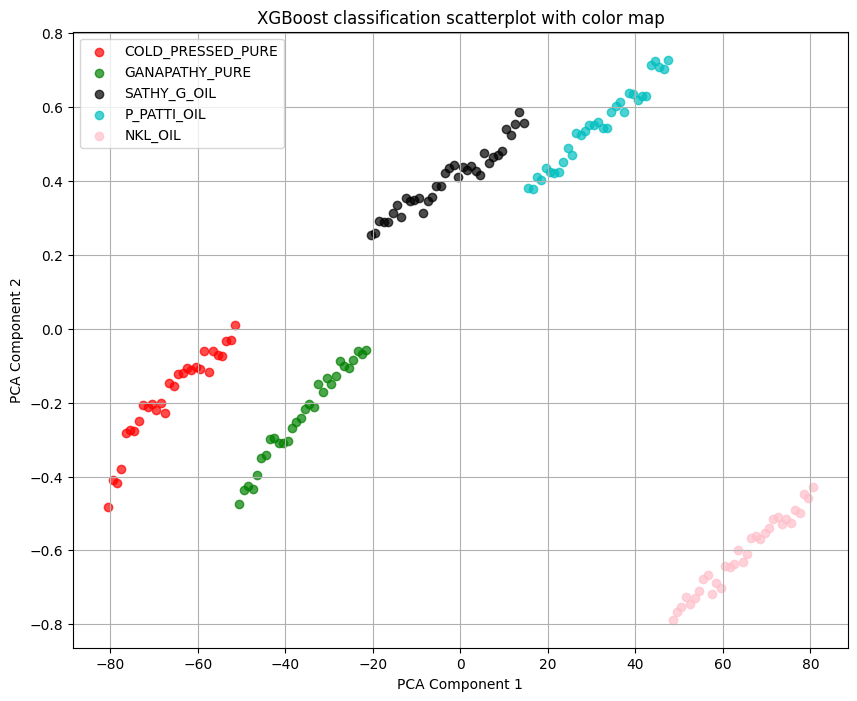

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 1. Load CSV
data = pd.read_csv('/content/Transmitance_for_five_pure_oils.csv')

# 2. Separate features and labels
X = data.drop(['category','name_of_the_oil'], axis=1)
y = data['category']

# 3. Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X, y_encoded)
y_pred = xgb.predict(X)

# 5. PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 6. Color map and class names
# your class names in order (make sure order is correct)
class_names = ['COLD_PRESSED_PURE','GANAPATHY_PURE','SATHY_G_OIL','P_PATTI_OIL','NKL_OIL']

# a ListedColormap for enough colors
my_cmap = ListedColormap(['r','g','black','c','pink'])

# plot
plt.figure(figsize=(10,8))

for cls in np.unique(y_pred):
    idx = np.where(y_pred == cls)
    plt.scatter(X_reduced[idx, 0], X_reduced[idx, 1],
                color=my_cmap(cls),  # color from colormap
                label=class_names[cls], alpha=0.7)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('XGBoost classification scatterplot with color map')
plt.legend()
plt.grid(True)
plt.show()



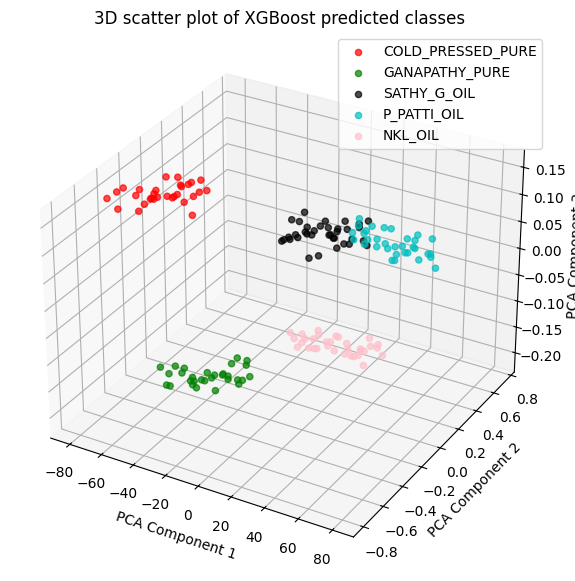

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# re-run PCA for 3D
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

# define class names in order
class_names = ['COLD_PRESSED_PURE','GANAPATHY_PURE','SATHY_G_OIL','P_PATTI_OIL','NKL_OIL']

# custom ListedColormap
my_cmap = ListedColormap(['r','g','black','c','pink'])

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

for cls in np.unique(y_pred):
    idx = np.where(y_pred == cls)
    ax.scatter(X_reduced[idx, 0], X_reduced[idx, 1], X_reduced[idx, 2],
               color=my_cmap(cls),
               label=class_names[cls],
               alpha=0.7)

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.title('3D scatter plot of XGBoost predicted classes')
plt.legend()
plt.show()


In [ ]:
df_5_cold_location_oil_plsr = pd.DataFrame(x_pls)

In [ ]:
df_5_cold_location_oil_plsr

,0,1,2,3
0,-5.243526,-2.886178,-8.485913,-1.387046
1,-7.044989,-3.898895,-6.962124,0.316435
2,-7.098766,-4.205739,-6.461737,0.367972
3,-6.922315,-3.166656,-6.380259,-0.248230
4,-8.806896,-2.746983,-2.552569,2.585273
...,...,...,...,...
157,13.362885,-1.985653,-4.856026,0.762090
158,14.127822,-0.056503,-4.259596,-0.721561
159,13.704718,0.981518,-3.795544,-2.307925
160,14.616547,1.231947,-3.433985,-1.724963


In [ ]:
df_5_cold_location_oil_plsr.to_csv('5_location_oil_PLSR.csv')

In [ ]:
df_5_location_oil_K_means_pca = pd.DataFrame(lo)

In [ ]:
df_5_location_oil_K_means_pca.to_csv('5_location_oil_kmeans.csv')

In [ ]:
df_8_cold_pressed_oil_K_means_pca

NameError: name 'df_8_cold_pressed_oil_K_means_pca' is not defined